In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
gold = pd.read_csv('gld_price_data.csv')

In [3]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


# getting some basic informations about the data

In [4]:
gold.shape

(2290, 6)

In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# checking the number of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# getting the statistical measures of the data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
gold.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [38]:
gold["SLV"].value_counts()

16.150000    11
16.070000     9
15.110000     8
15.910000     8
15.590000     7
             ..
40.580002     1
38.270000     1
33.720001     1
36.980000     1
15.454200     1
Name: SLV, Length: 1331, dtype: int64

In [39]:
gold["SLV"].describe()

count    2290.000000
mean       20.084997
std         7.092566
min         8.850000
25%        15.570000
50%        17.268500
75%        22.882500
max        47.259998
Name: SLV, dtype: float64

<Axes: >

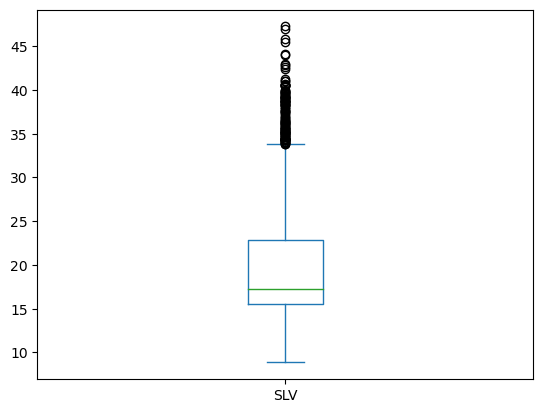

In [40]:
gold["SLV"].plot(kind="box")

In [41]:
gold["SLV"].isnull().sum()

0

In [34]:
gold["USO"].value_counts()

33.189999    6
10.110000    6
10.280000    6
36.160000    6
31.780001    5
            ..
41.930000    1
41.130001    1
39.389999    1
40.910000    1
14.405800    1
Name: USO, Length: 1514, dtype: int64

In [35]:
gold["USO"].describe()

count    2290.000000
mean       31.842221
std        19.523517
min         7.960000
25%        14.380000
50%        33.869999
75%        37.827501
max       117.480003
Name: USO, dtype: float64

<Axes: >

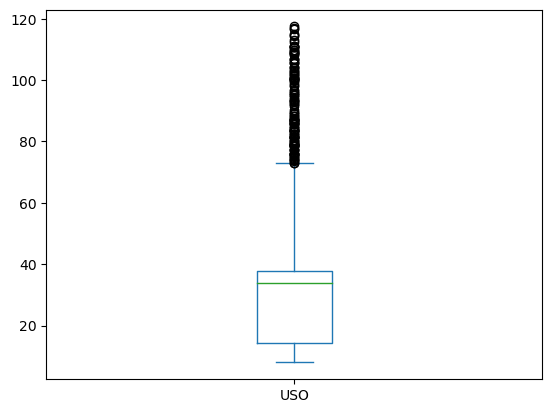

In [36]:
gold["USO"].plot(kind="box")

In [37]:
gold["USO"].isnull().sum()

0

In [30]:
gold["GLD"].value_counts()

115.940002    5
117.959999    4
122.209999    4
126.300003    4
124.589996    4
             ..
147.179993    1
146.240005    1
145.729996    1
148.339996    1
122.543800    1
Name: GLD, Length: 1930, dtype: int64

In [31]:
gold["GLD"].describe()

count    2290.000000
mean      122.732875
std        23.283346
min        70.000000
25%       109.725000
50%       120.580002
75%       132.840004
max       184.589996
Name: GLD, dtype: float64

<Axes: >

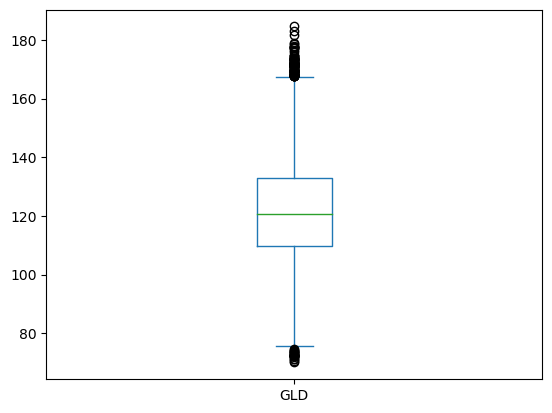

In [32]:
gold["GLD"].plot(kind="box")

In [33]:
gold["GLD"].isnull().sum()

0

In [25]:
gold["SPX"].value_counts()

1447.160034    2
2268.899902    2
2066.659912    2
2095.840088    2
2373.469971    2
              ..
1278.359985    1
1267.640015    1
1265.420044    1
1287.869995    1
2725.780029    1
Name: SPX, Length: 2277, dtype: int64

In [26]:
gold["SPX"].describe()

count    2290.000000
mean     1654.315776
std       519.111540
min       676.530029
25%      1239.874969
50%      1551.434998
75%      2073.010070
max      2872.870117
Name: SPX, dtype: float64

<Axes: >

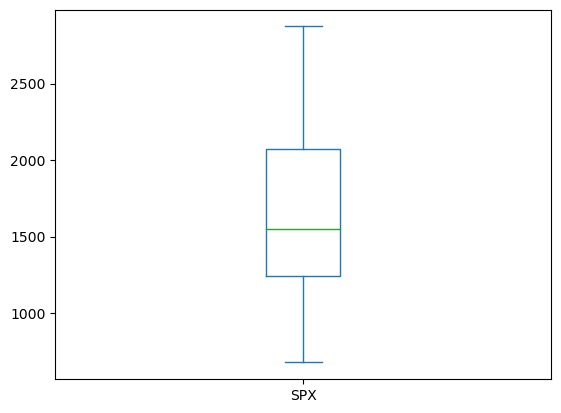

In [28]:
gold["SPX"].plot(kind="box")

In [29]:
gold["SPX"].isnull().sum()

0

In [20]:
gold["EUR/USD"].value_counts()

1.437298    4
1.322401    3
1.285843    3
1.088898    3
1.578507    3
           ..
1.423427    1
1.396902    1
1.404060    1
1.436451    1
1.182033    1
Name: EUR/USD, Length: 2066, dtype: int64

In [21]:
gold["EUR/USD"].describe()

count    2290.000000
mean        1.283653
std         0.131547
min         1.039047
25%         1.171313
50%         1.303297
75%         1.369971
max         1.598798
Name: EUR/USD, dtype: float64

<Axes: ylabel='Frequency'>

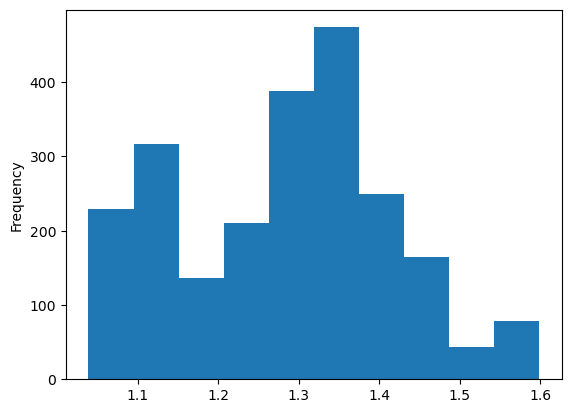

In [22]:
gold["EUR/USD"].plot(kind="hist")

<Axes: >

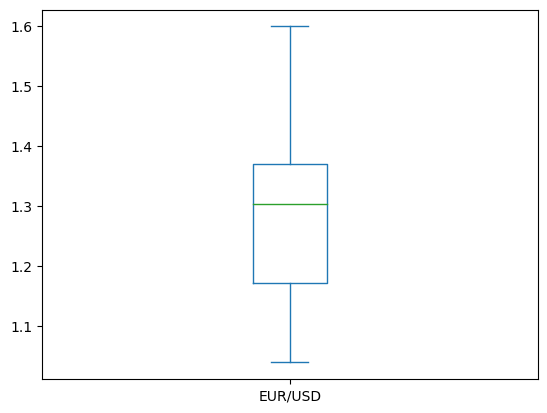

In [23]:
gold["EUR/USD"].plot(kind="box")

In [24]:
gold["EUR/USD"].isnull().sum()

0

# Correlation:

Positive Correlation                                    
Negative Correlation

In [8]:
correlation = gold.corr()

C:\Users\nk\AppData\Local\Temp\ipykernel_11360\2859792259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold.corr()


<Axes: >

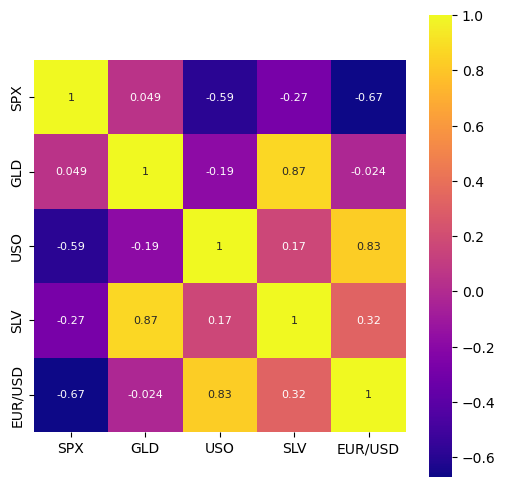

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={"size":8},cmap="plasma")

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [11]:
# checking the distribution of the GLD Price

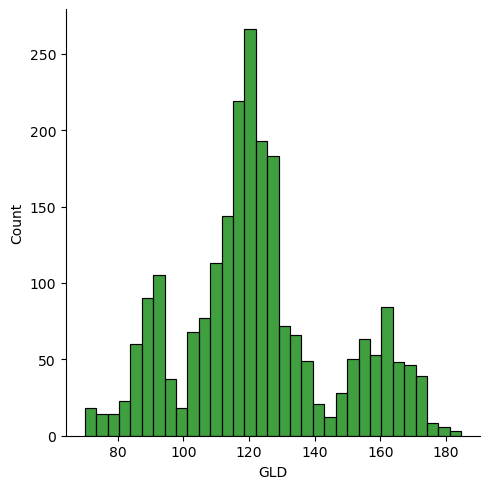

In [12]:
sns.displot(gold['GLD'],color='green')

In [13]:
X = gold.drop(['Date','GLD'],axis=1)
y = gold['GLD']

In [14]:
y.shape

(2290,)

# training the model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape

(1832, 4)

In [50]:
y_train.shape

(1832,)

In [51]:
X_test.shape

(458, 4)

In [52]:
y_test.shape

(458,)

In [16]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
print(y_test,)

2178    122.320000
1271    129.899994
1268    126.980003
44       96.500000
2025    117.580002
           ...    
1872    126.680000
1075    167.179993
299      93.849998
306      96.230003
1132    154.339996
Name: GLD, Length: 458, dtype: float64


In [42]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
r2_score(y_test,pred)

0.9904105388876132

In [43]:
print(pred)

[122.38369937 130.5210032  127.74129988  96.55109738 118.80900091
 114.23109924 124.77720116 117.65209936 107.89240144  98.31039957
  95.26629911 167.59039832 149.63190091 116.08980019 170.80410135
  84.89929935 123.1363988  109.52909712 113.10480128 131.6122031
 124.38419921 113.81430097 115.59540024 108.73919958 108.6605018
 125.75729904 119.11339979 112.36319929 113.30590157 125.53669876
 146.25350174  89.44950002 167.25489994 113.75619945 108.58360121
 120.22770065 142.01219955 161.24200098 174.04959822 153.12270106
 119.03430086 113.63450031 121.32239973 113.60759899 122.01570034
 107.91080099  88.33319901 114.36959933 129.84850289 118.07540134
 104.77200011 129.77440255 107.08699838 160.53410347 131.75070076
 118.83359968 147.00900019 134.49500201  95.47540108 124.50970138
 114.82309872  86.22810124 104.24259895 113.88070095  84.23689937
 122.25740065 116.57679905 113.53980203 165.74930254  92.41670006
  80.09690124 160.97350102 158.42870266 106.94060002 149.55430035
 109.7375975